<a href="https://colab.research.google.com/github/Yiting916/data_analysis/blob/main/05-02.LAB_VideoGameSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-02.LAB_VideoGameSales_學號_姓名  (例: "05-02.LAB_VideoGameSales_00_陳仁政")
* 附件檔名請設定為： 05-02.LAB_VideoGameSales_學號_姓名.ipynb (例: "05-02.LAB_VideoGameSales_00_陳仁政.ipynb")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Video Game Sales
- https://www.kaggle.com/gregorut/videogamesales
- https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization

<div><p>This dataset contains a list of video games with sales greater than 100,000 copies.  It was generated by a scrape of <a href="http://www.vgchartz.com/" target="_blank">vgchartz.com</a>.</p>
<p>Fields include</p>
<ul>
<li><p>Rank - Ranking of overall sales</p></li>
<li><p>Name - The games name</p></li>
<li><p>Platform - Platform of the games release (i.e. PC,PS4, etc.)</p></li>
<li><p>Year - Year of the game's release</p></li>
<li><p>Genre - Genre of the game</p></li>
<li><p>Publisher - Publisher of the game</p></li>
<li><p>NA_Sales - Sales in North America (in millions)</p></li>
<li><p>EU_Sales - Sales in Europe (in millions)</p></li>
<li><p>JP_Sales - Sales in Japan (in millions)</p></li>
<li><p>Other_Sales - Sales in the rest of the world (in millions)</p></li>
<li><p>Global_Sales - Total worldwide sales.</p></li>
</ul>
<p>The script to scrape the data is available at <a href="https://github.com/GregorUT/vgchartzScrape" target="_blank">https://github.com/GregorUT/vgchartzScrape</a>.<br>
It is based on BeautifulSoup using Python.<br>
There are 16,598 records.  2 records were dropped due to incomplete information.</p></div>

## 載入與整理資料

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("/content/drive/MyDrive/YiTing/Learning/Python/資料分析技術/data/vgsales.csv")
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
#查看資料筆數跟欄位數目
data.shape

(16598, 11)

In [ ]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# # # 年份的格式錯誤，所以需要更改成整數型態
# data['Year'].replace(np.nan, 0, inplace=True) #因為整數沒有nan，所以需要先將nan改成 0
# data['Year'] = data['Year'].astype('int32') #改變年份的資料型態
# data.head()

In [ ]:
# 查看一下資料的基本統計值
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


↑ 問題：為何各地區的銷售數量的平均跟中位數都差異那麼大？

# 哪一種類的電玩最受歡迎

In [ ]:
# 計算各種電玩類別的總數
data.groupby('Genre').size()

,0
Genre,
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310


In [ ]:
data['Genre'].value_counts().index

Index(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
       'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'],
      dtype='object', name='Genre')

In [ ]:
# 練習題
# 找出遊戲總數最多的前三年
data['Year'].value_counts()
# data['Year'].value_counts().sort_values(ascending=False).index[:3]

,count
Year,
2009.0,1431
2008.0,1428
2010.0,1259
2007.0,1202
2011.0,1139
2006.0,1008
2005.0,941
2002.0,829
2003.0,775


In [ ]:
# 練習題
# 找出遊戲總數最多的前三個遊戲商
data['Publisher'].value_counts()

,count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
...,...
Warp,1
New,1
Elite,1


In [ ]:
# 練習題
# 找出遊戲總數最多的前三個平台
data['Platform'].value_counts()

,count
Platform,
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824


In [ ]:
# 練習題
# 找出遊戲總銷售額最多的前三個平台
data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


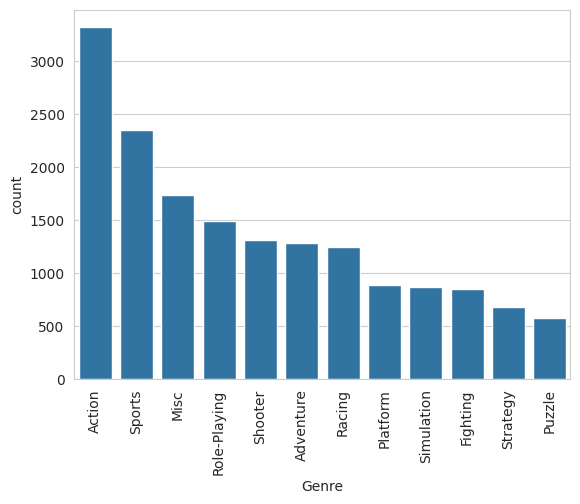

In [ ]:
# 畫出直方圖用來顯示不同電玩總類的總數
sns.countplot(data, x='Genre', order=data['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

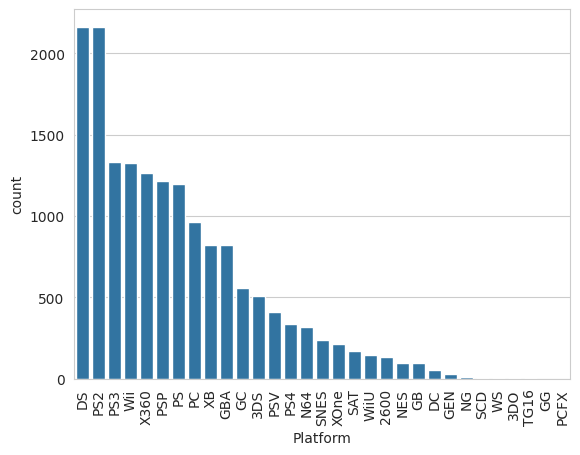

In [ ]:
#練習題
#畫出每個平台的遊戲數目
sns.countplot(data, x='Platform', order=data['Platform'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

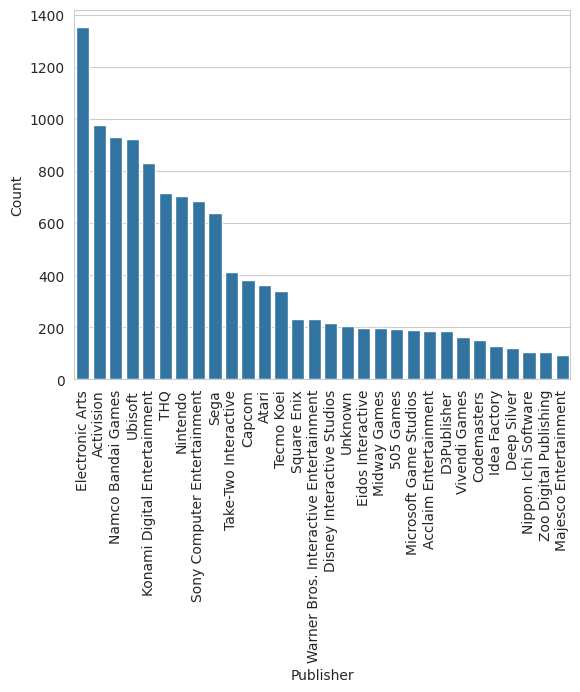

In [60]:
#練習題
#畫出每個發行商的遊戲數目
dg = data.groupby('Publisher').size().sort_values(ascending=False)
dg = dg.reset_index(name='Count')[:30]
sns.barplot(data=dg, y='Count', x='Publisher')
plt.xticks(rotation=90)
plt.show()

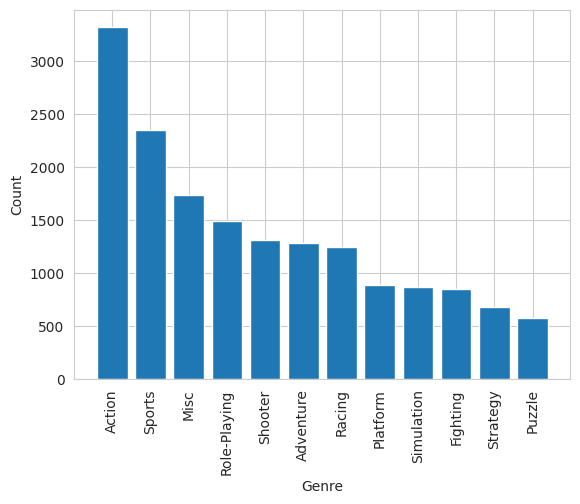

In [ ]:
# 畫出直方圖用來顯示不同電玩總類的總數 (限制使用 Matplotlib)
#gc = data['Genre'].value_counts()
plt.bar(gc.index, gc.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 每年的遊戲數目 countplot()

In [ ]:
# 統計每一年遊戲發行的總數
data['Year'].value_counts()

,count
Year,
2009.0,1431
2008.0,1428
2010.0,1259
2007.0,1202
2011.0,1139
2006.0,1008
2005.0,941
2002.0,829
2003.0,775


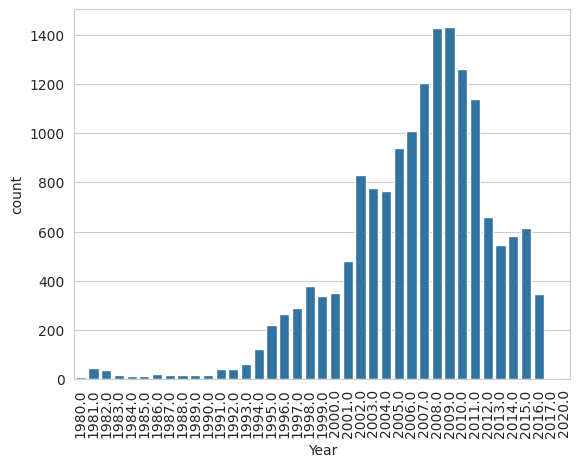

In [ ]:
# 畫出直方圖用來顯示每一年發行的遊戲數目
#plt.figure(figsize=(15, 10))
sns.countplot(data, x='Year')
plt.xticks(rotation=90)
plt.show()

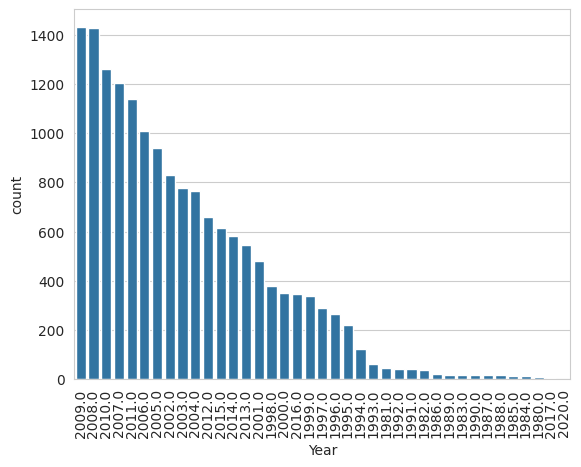

In [ ]:
# 將上面的直方圖根據發行遊戲數目來排序
# 提示 countplot() 中有個參數order可以用來限制X軸的順序
# 要先產生正確的Year順序當成order的資料
#plt.figure(figsize=(15, 10))
sns.countplot(data, x='Year', order=data['Year'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

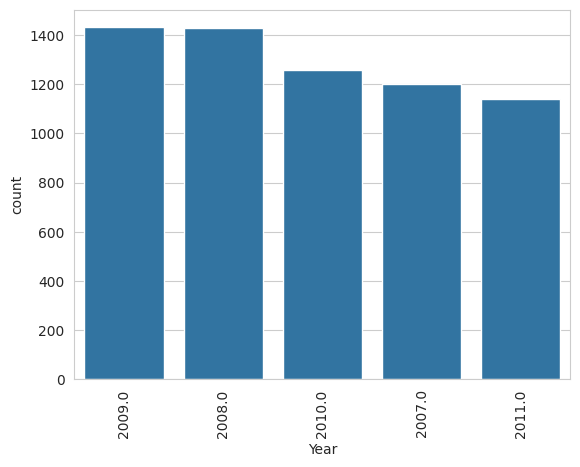

In [ ]:
# 根據上圖，但是只顯示前五個發行遊戲最多的年份
# plt.figure(figsize=(15, 10))
sns.countplot(data, x='Year', order=data['Year'].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

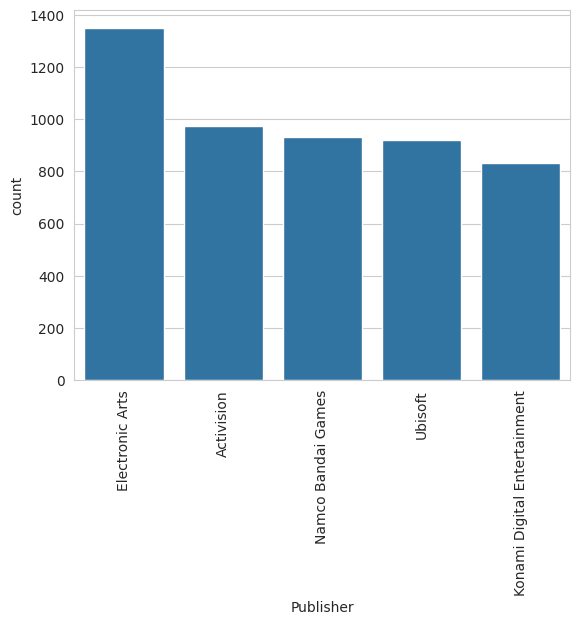

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五名發行商
sns.countplot(data, x='Publisher', order=data['Publisher'].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

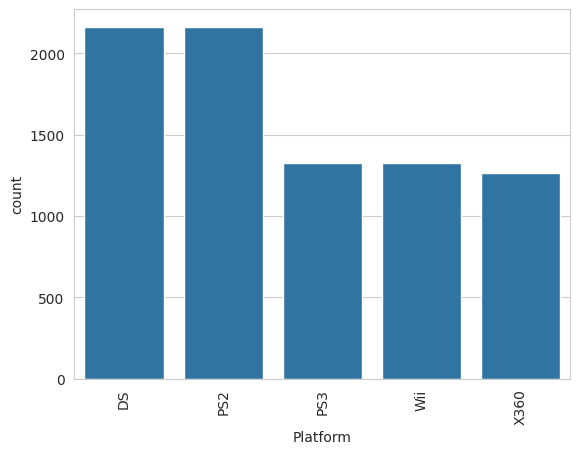

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五種平台
sns.countplot(data, x='Platform', order=data['Platform'].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

### 加入hue

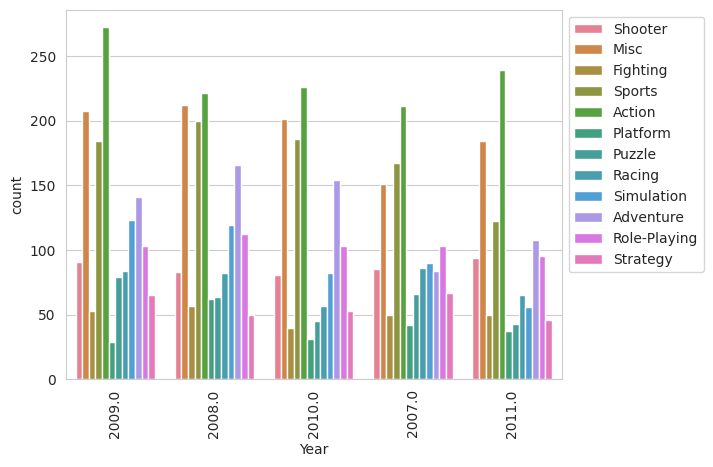

In [ ]:
# 畫出直方圖顯示：
# 發行電玩數量最多的前五年的數量
# 依據電玩種類分別顯示
sns.countplot(data, x='Year', order=data['Year'].value_counts().index[:5], hue="Genre")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

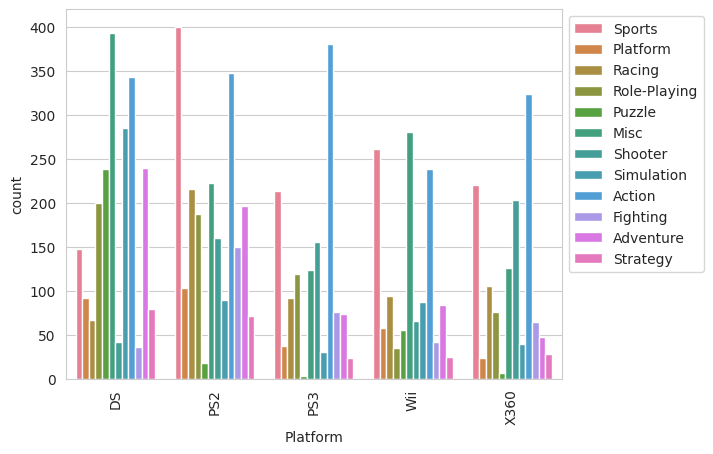

In [ ]:
#練習題
# 畫出直方圖顯示：
# 發行電玩數目最多的前五個平台
# 依據電玩種類分別顯示發行遊戲數目
sns.countplot(data, x='Platform', order=data['Platform'].value_counts().index[:5], hue='Genre')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

# 每年的遊戲銷售總量 barplot()

In [ ]:
# 計算每年遊戲的銷售總量
data.groupby('Year')['Global_Sales'].sum()

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


In [ ]:
# 將Year從索引重新變成欄位
# 轉為 DataFrame 形式
dgy = data.groupby('Year')['Global_Sales'].sum().reset_index()
dgy
# dgy['Year']

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


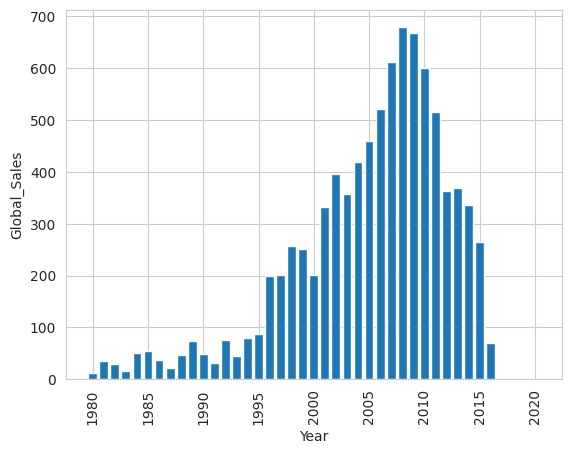

In [ ]:
#限制使用Matplotlib來畫出每年遊戲的銷售總量
plt.bar(dgy['Year'], dgy['Global_Sales'])
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.xticks(rotation=90)
plt.show()

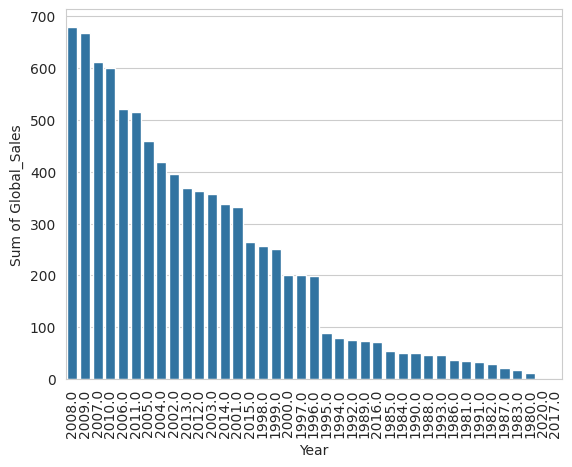

In [ ]:
# 將上圖依照全年銷售額來排序
sorted_dgy = dgy.sort_values(by=['Global_Sales'], ascending=False)
sns.barplot(data=sorted_dgy, x='Year', y='Global_Sales', order=sorted_dgy['Year'])
plt.xlabel('Year')
plt.ylabel('Sum of Global_Sales')
plt.xticks(rotation=90)
plt.show()

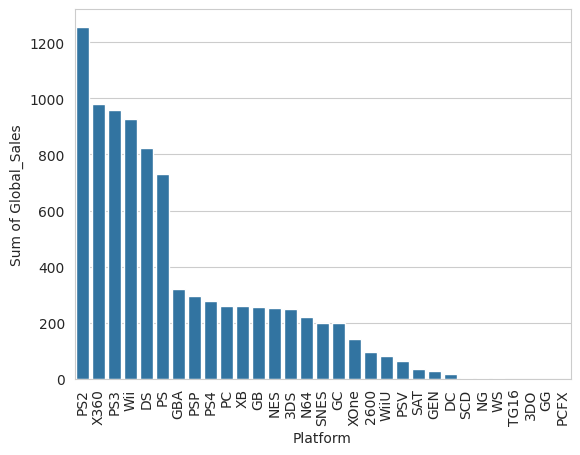

In [12]:
#練習題
#請畫出各平台的銷售總額
dg = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of Global_Sales')
sns.barplot(dg, x='Platform', y='Sum of Global_Sales')
plt.xticks(rotation=90)
plt.show()

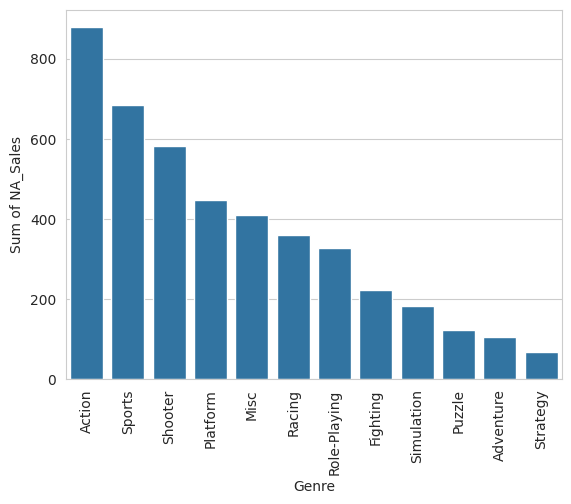

In [9]:
#練習題
#請畫出各遊戲種類的北美銷售總額
dg = data.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).reset_index(name='Sum of NA_Sales')
sns.barplot(dg, x='Genre', y='Sum of NA_Sales')
plt.xticks(rotation=90)
plt.show()

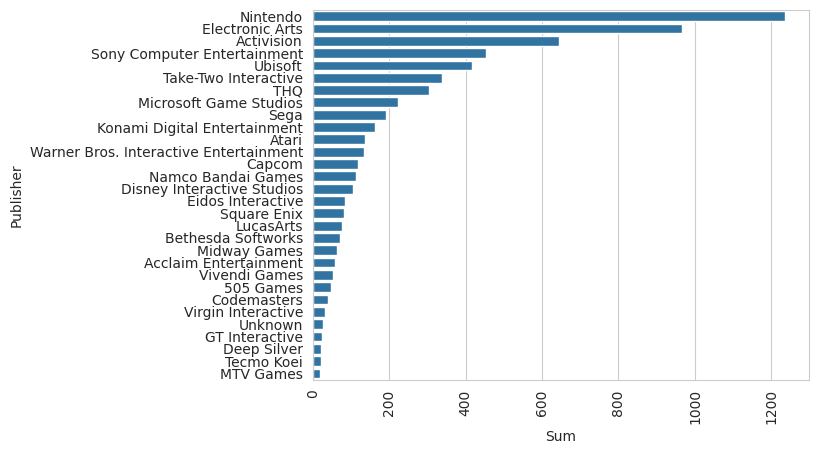

In [62]:
#練習題
#請畫出各遊戲發行商的北美加歐洲銷售總額
dg = data.groupby('Publisher')[['NA_Sales','EU_Sales']].sum()
for i in dg:
  dg['Sum'] = dg['NA_Sales'] + dg['EU_Sales']
dg = dg.sort_values(by='Sum', ascending=False)[:30]
sns.barplot(dg, y='Publisher', x='Sum')
plt.xticks(rotation=90)
plt.show()

## 每年分別哪一種遊戲種類的發行數目最多？

In [63]:
# 根據 年份與遊戲種類 來做群組，並計算每個群組的總數
data.groupby(['Year','Genre']).size().reset_index(name='Count')

,Year,Genre,Count
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1980.0,Sports,1
...,...,...,...
384,2016.0,Sports,38
385,2016.0,Strategy,10
386,2017.0,Action,1
387,2017.0,Role-Playing,2


In [64]:
# 依據年份的不同，計算每年中遊戲種類數量最多的那個數量
dg = data.groupby(['Year','Genre']).size().reset_index(name='Count')
dg_max = dg.groupby('Year')['Count'].max()
dg_max

,Count
Year,
1980.0,4
1981.0,25
1982.0,18
1983.0,7
1984.0,3
1985.0,4
1986.0,6
1987.0,4
1988.0,4


In [65]:
#將上面的結束使用transform對應回去原本的資料表
dg['Max'] = dg.groupby('Year')['Count'].transform(max)
dg

<ipython-input-65-f72225825c1c>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dg['Max'] = dg.groupby('Year')['Count'].transform(max)


,Year,Genre,Count,Max
0,1980.0,Action,1,4
1,1980.0,Fighting,1,4
2,1980.0,Misc,4,4
3,1980.0,Shooter,2,4
4,1980.0,Sports,1,4
...,...,...,...,...
384,2016.0,Sports,38,119
385,2016.0,Strategy,10,119
386,2017.0,Action,1,2
387,2017.0,Role-Playing,2,2


In [66]:
#找出year_max_df中那些資料的欄位'count'值與上面找出的最大值一樣
dg.loc[dg['Count'] == dg['Max']]
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
year_sale_max.head()


<ipython-input-66-2842b3043b7e>:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']


,Year,Genre,Global_Sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.84
2,1982.0,Puzzle,10.03
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10


In [ ]:
#將上面的程式整合在一起


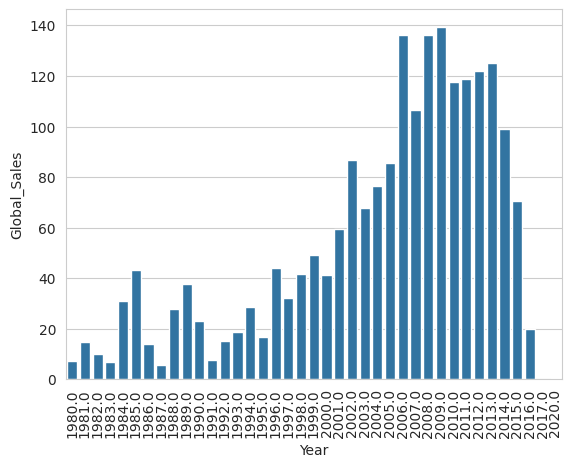

In [67]:
# 使用直方圖來顯示上面表格的結果
sns.barplot(year_sale_max, x='Year', y='Global_Sales')
plt.xticks(rotation=90)
plt.show()

<ipython-input-54-e0e92f8fee13>:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']


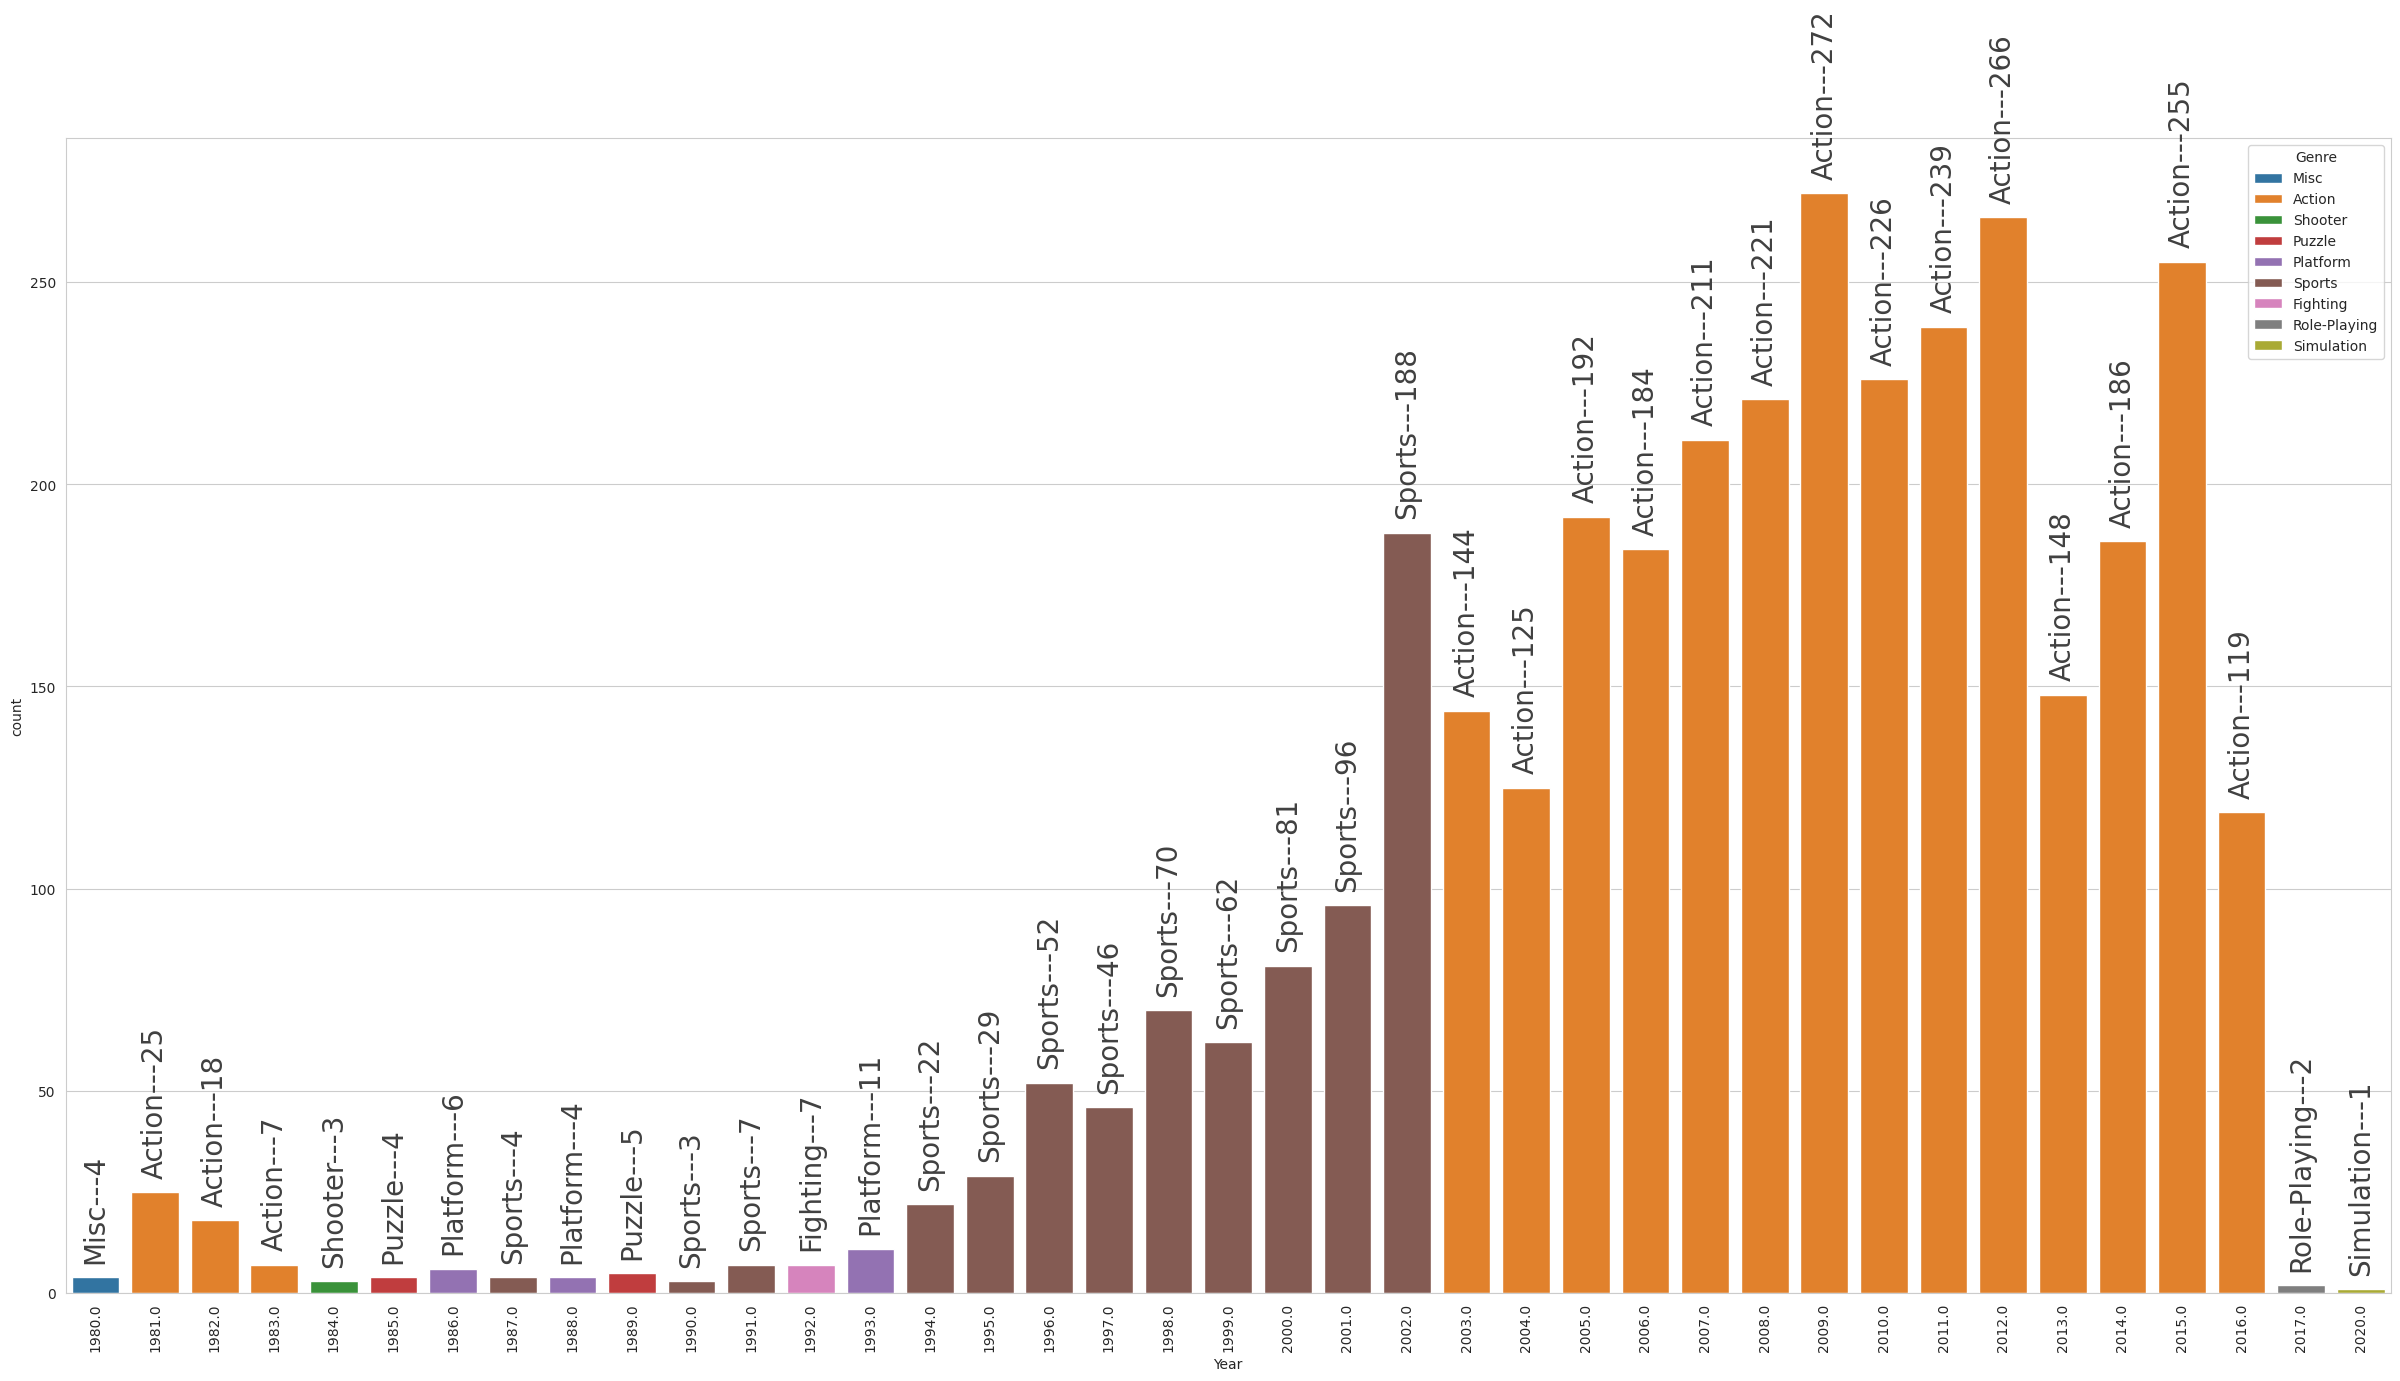

In [ ]:
# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
# 1. 老師的方法
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx]#.reset_index(drop=True)

#因為每年可能會有不同類型的遊戲發行數目一樣，所以去除重複的
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last')
year_max_genre.head()

# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre, hue='Genre')

#標示出每個直條代表的類型跟數目
genre = year_max_genre['Genre'].values
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value+5,
           str(genre[index] + '---' +str(value)),
           color='#404040', size=20, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

# # 2. ChatGPT生成的方法
# # 按年和遊戲類型進行分組，計算每組的遊戲數量
# year_genre_counts = data.groupby(['Year', 'Genre']).size().reset_index(name='Game_Count')

# # 找出每年遊戲類型數量最多的類型
# max_genre_per_year = year_genre_counts.loc[year_genre_counts.groupby('Year')['Game_Count'].idxmax()]

# # 顯示結果
# print(max_genre_per_year)

# # 可選：如果你想可視化結果，可以使用條形圖
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Year', y='Game_Count', hue='Genre', data=max_genre_per_year)
# plt.title('Most Popular Game Genre per Year')
# plt.xlabel('Year')
# plt.ylabel('Number of Games')
# plt.xticks(rotation=90)
# plt.show()


In [ ]:
# 練習題
# 請將上圖改成依照發行數目排序

In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲數目最多


In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲數目最多


In [ ]:
# 練習題
# 請計算每一個類型，哪一年的遊戲數目最多


## 每年哪一種電玩種類的銷售數量最多？

In [ ]:
# 根據 年份 跟 遊戲種類來進行群組，並計算每個群組的全球銷售總額
dg = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(name='Sum')
dg

,Year,Genre,Sum
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49
...,...,...,...
384,2016.0,Sports,14.60
385,2016.0,Strategy,0.50
386,2017.0,Action,0.01
387,2017.0,Role-Playing,0.04


In [ ]:
# 根據年份分別找出該年份中那些遊戲種類的銷售總額是最大的


In [ ]:
#將上面的程式整合在一起


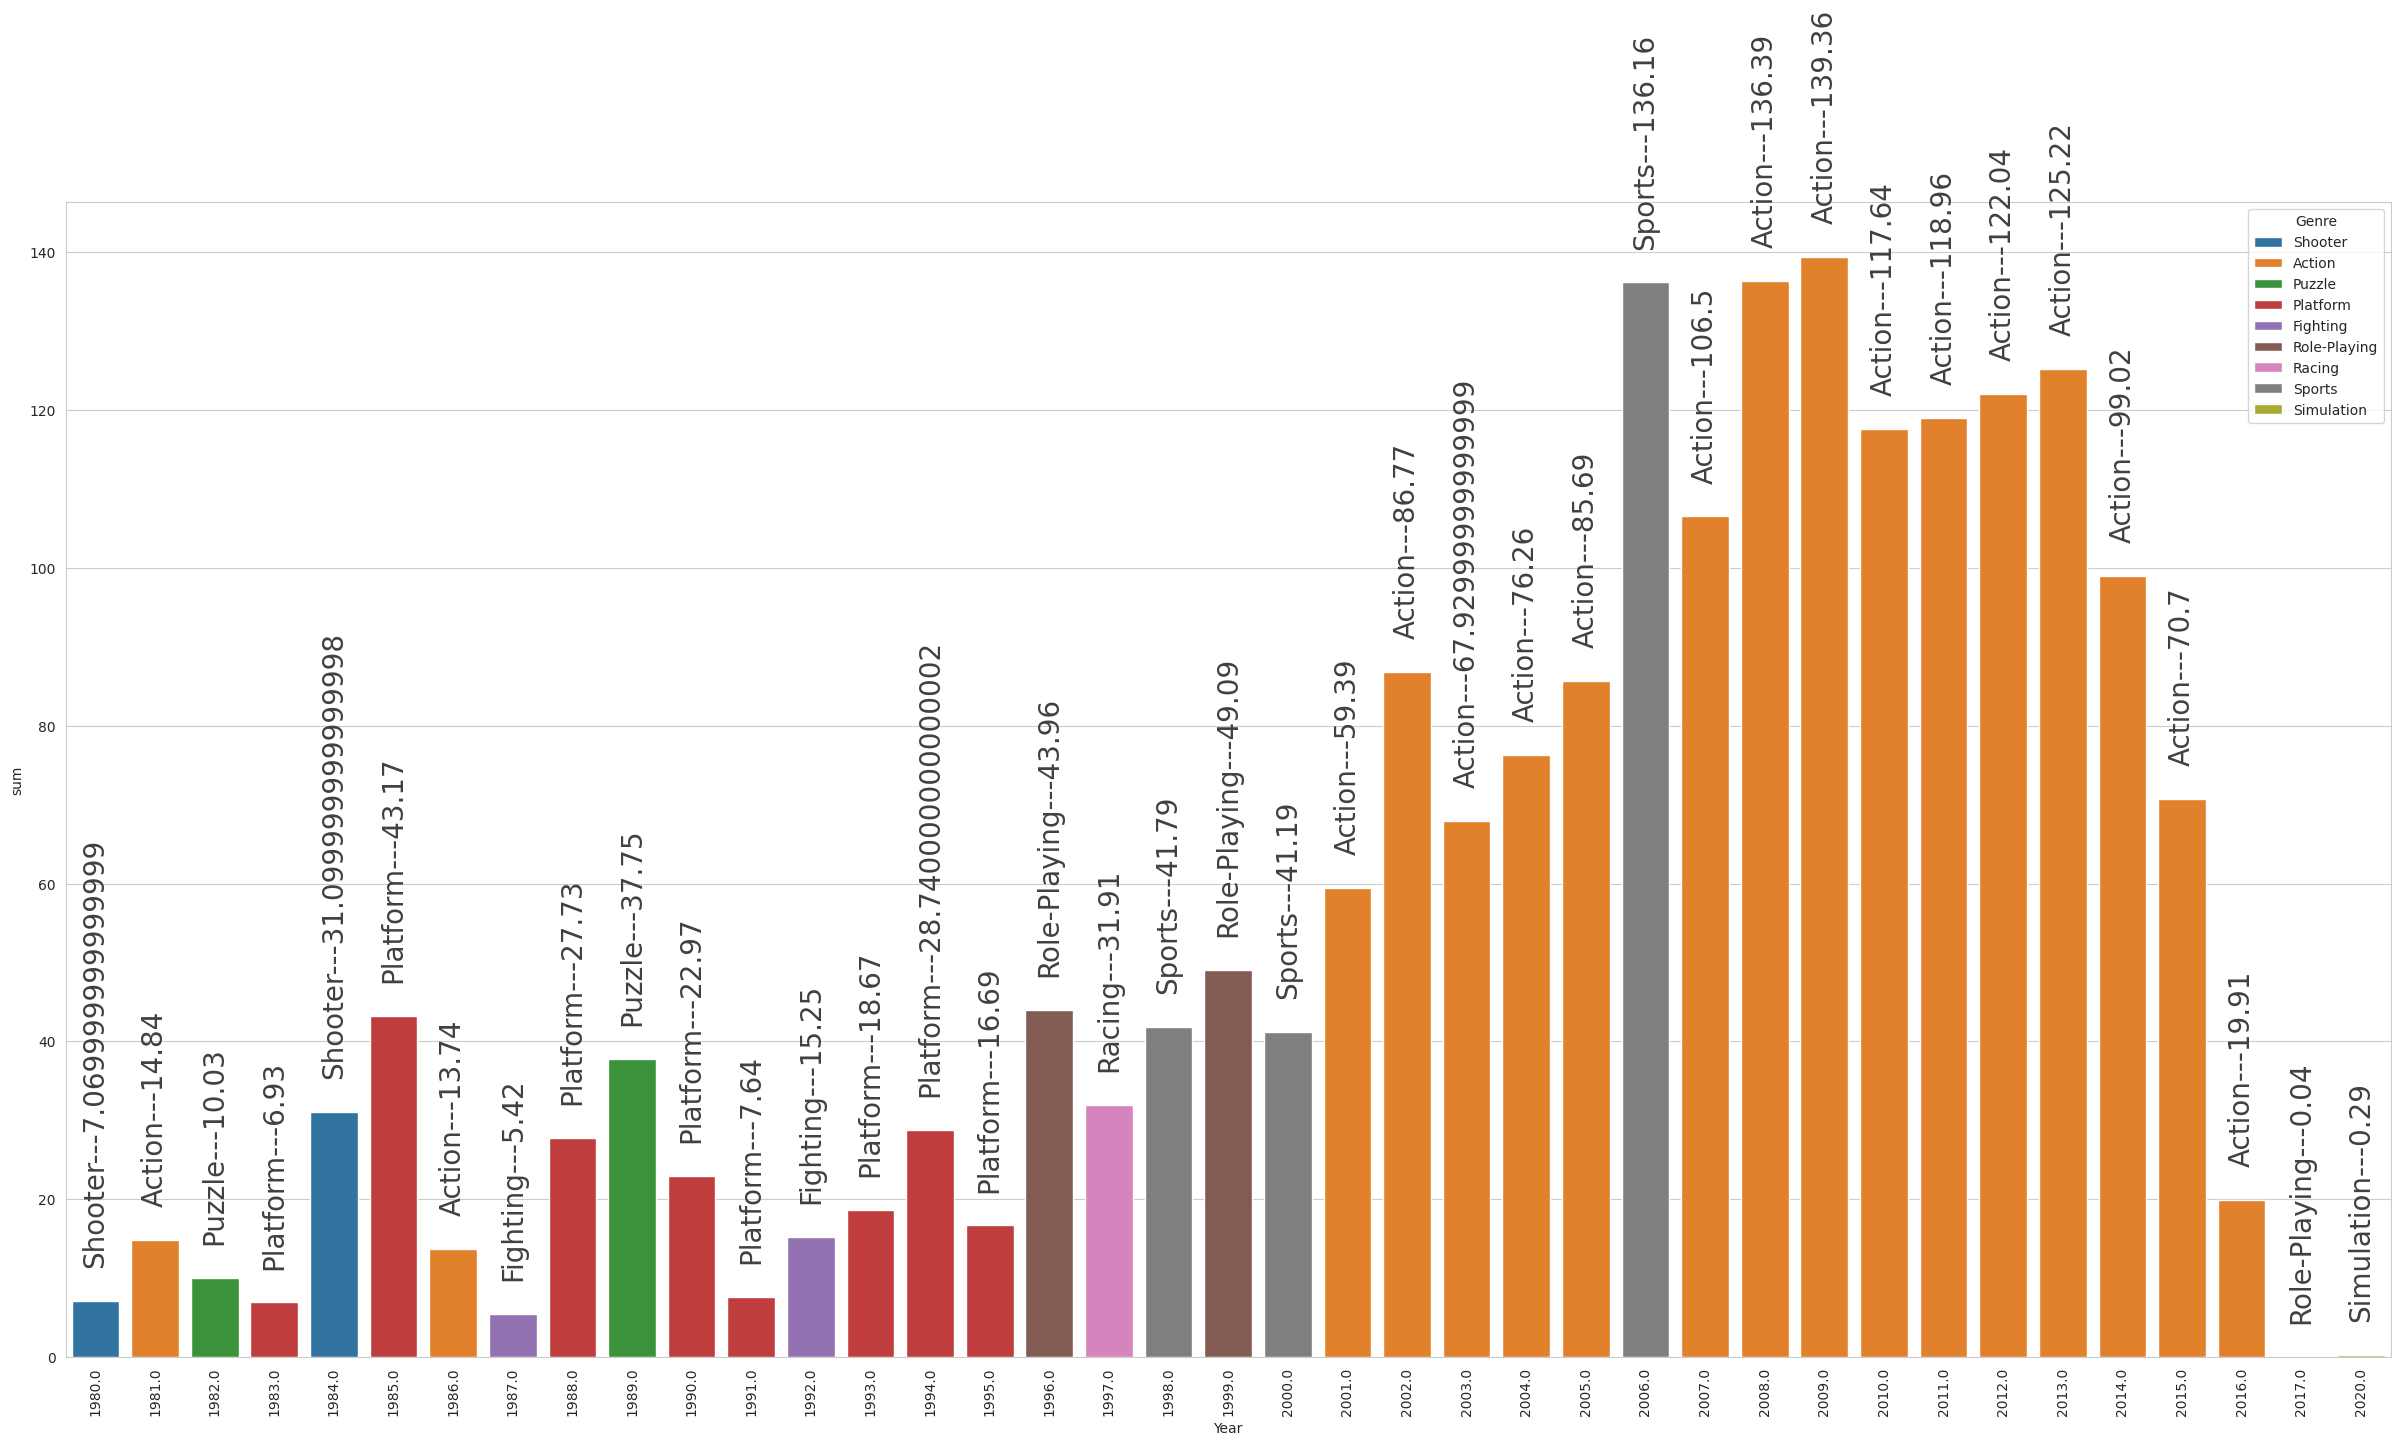

In [ ]:
# 使用直方圖畫出來
year_max_df = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(name='sum')
year_max_df
year_max_idx = year_max_df.groupby(['Year'])['sum'].idxmax()
year_max_genre = year_max_df.iloc[year_max_idx]#.reset_index(drop=True)
year_max_genre

# #因為每年可能會有不同類型的遊戲發行數目一樣，所以去除重複的
# year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "sum"], keep='last')
year_max_genre.head()

# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='sum', data=year_max_genre, hue='Genre')

#標示出每個直條代表的類型跟數目
genre = year_max_genre['Genre'].values
index = 0
for value in year_max_genre['sum'].values:
    g.text(index, value+5,
           str(genre[index] + '---' +str(value)),
           color='#404040', size=20, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 練習題
# 請將上圖改成依照銷售數量排序

In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪類型的遊戲銷售量最多

## 哪一種遊戲全球的銷售總數量最高？

In [ ]:
# 根據遊戲種類進行群組，個別計算全球銷售總數
dg = data.groupby('Genre')['Global_Sales'].sum().reset_index(name='Sum')
dg

,Genre,Sum
0,Action,1751.18
1,Adventure,239.04
2,Fighting,448.91
3,Misc,809.96
4,Platform,831.37
5,Puzzle,244.95
6,Racing,732.04
7,Role-Playing,927.37
8,Shooter,1037.37
9,Simulation,392.20


In [29]:
# 將上面的資料畫出來
sns.barplot(x='Sum', y='Genre', data=dg.sort_values(by=['Sum'], ascending=False))
plt.show()

KeyError: 'Sum'

In [ ]:
#練習題
#哪一個開發商在日本地區的銷售總數最高

In [ ]:
#練習題
#哪一個平台在北美與歐洲地區的銷售總數最高

## 全球銷售數量前20大遊戲

In [ ]:
# 全球銷售數量前20大遊戲


In [ ]:
# 使用直方圖把上面的資料畫出來


In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲

In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲公司

## 比較各區域不同遊戲種類的銷售數量

In [ ]:
# 取出 遊戲總類 與 四個銷售地區 的欄位資料成為 新表格


In [ ]:
# 根據上面的表格，以遊戲種類為群組，每個群組計算四個不同地區分別的銷售總合


In [ ]:
# 使用HeatMAP畫出上面表格
# 提示 sns.heatmap()


### 問題：從上圖能看出哪些結論？

In [ ]:
#練習題
#畫出不同平台各區域的銷售數量熱圖


# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

### Pandas melt() 示範

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()

# pd.melt會將一個DataFrame拆解 key=欄位名稱, value=欄位值
comp_table = pd.melt(comp_table, id_vars=['Genre'],
                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                var_name='Sale_Area', value_name='Sale_Price')
comp_table

In [ ]:
# 根據上面的資料
# 使用直方圖畫出
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量
# 提示 barplot(), hue 參數可以設為 Sale_Area


In [ ]:
# 練習題
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

# 前20大開發商

In [ ]:
#列出每個開發商的遊戲數目
top_publisher = data.groupby('Publisher').size().sort_values(ascending=False).reset_index(name='Count')
top20 = top_publisher.iloc[:20]
top20

,Publisher,Count
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
5,THQ,715
6,Nintendo,703
7,Sony Computer Entertainment,683
8,Sega,639
9,Take-Two Interactive,413


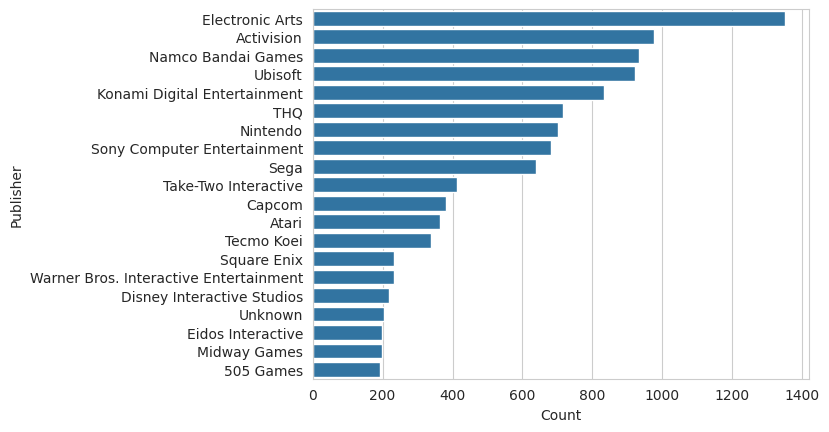

In [ ]:
# 用直方圖畫出前20大開發商的遊戲數量
sns.barplot(data=top20, x='Count', y='Publisher')
plt.show()

In [ ]:
# 練習題
# 用直方圖畫出前5大平台的遊戲數量

# 各遊戲開發商的全球銷售總數量

In [ ]:
#列出每個開發商的全球銷售總數量


In [ ]:
# 根據上面資料畫出
# 各遊戲開發商的全球銷售總數量


### 問題：根據上面兩張圖比較各遊戲廠商在遊戲數量與銷售的排名有何不同？

In [ ]:
#練習題
#畫出全球銷售遊戲數量前10大的遊戲平台

# 每年遊戲數目最多的開發商

In [ ]:
# 計算每年分別是那些開發商的遊戲數目最多


In [ ]:
# 使用直方圖畫出上面表格資料


# 各區域遊戲的銷售總量

In [ ]:
# 計算四個不同區域的遊戲銷售總量


In [ ]:
# 使用直方圖來畫出各區域遊戲的銷售總量


In [ ]:
# 使用圓餅圖來畫出各區域遊戲的銷售總量
# 提示： plt.pie()
